In [1]:
import pickle

In [2]:
with open("..//Data//DeepCDR_DualGCN_combo_run_plot_from_jupyter.pickle", "rb") as f: 
    catch = pickle.load(f)

In [3]:
from scipy.optimize import curve_fit

In [4]:
from scipy.stats import norm

In [5]:
from scipy import stats

In [6]:
import matplotlib.pyplot as plt

In [7]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))

In [8]:
import numpy as np

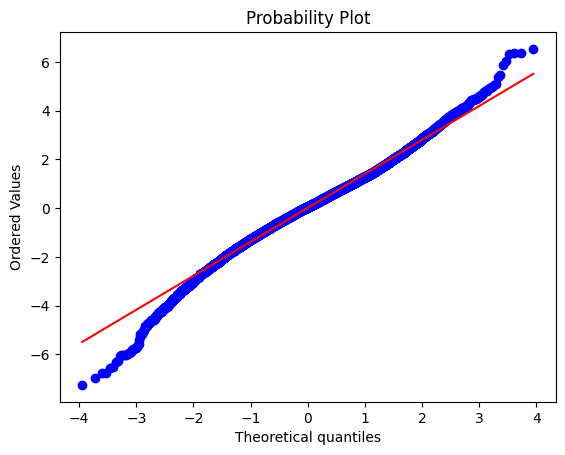

In [9]:
stats.probplot(catch[0][-4:][-1][:,0], dist="norm", plot=plt)
plt.show()

In [10]:
with open("..//Data//DeepCDR_DualGCN_combo_run_plot_from_jupyter_test_features_and_ground_truth.pickle", "rb") as f: 
    current_test = pickle.load( f)

In [11]:
# current_test[-1]

In [12]:
# best_test_preds, best_li, best_ui, best_residuals

In [13]:
y_test = current_test[-1]

In [14]:
add_preds = np.zeros((y_test.shape[0], y_test.shape[1]))
for item in catch: 
    preds = item[-4]
    add_preds+= preds

In [15]:
averaged_preds = add_preds/50

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mse = mean_squared_error(y_test, averaged_preds)

In [18]:
np.sqrt(mse)

1.3829669740524722

In [19]:
from scipy.stats import pearsonr

In [20]:
pearsonr_test = pearsonr(y_test.reshape(y_test.shape[0],), 
                                 averaged_preds.reshape(averaged_preds.shape[0],))

In [21]:
pearsonr_test.statistic

0.8728146233958161

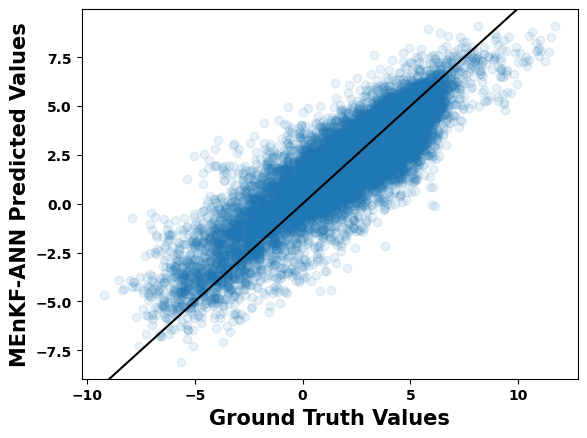

In [22]:
fig = plt.figure()
plt.scatter(y_test, averaged_preds, alpha = 0.1)
plt.axline((0,0), slope = 1, c = "black")
plt.xlabel("Ground Truth Values", fontweight = "bold",fontsize = 15)
plt.ylabel("MEnKF-ANN Predicted Values", fontweight = "bold", fontsize = 15)
plt.xticks(fontsize = 10, fontweight = "bold")
plt.yticks(fontsize = 10, fontweight = "bold")
fig.savefig('MEnKF_DeepCDR_DualGCN_Scatterplot_averaged_50.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('MEnKF_DeepCDR_DualGCN_Scatterplot_averaged_50.png', bbox_inches='tight')
plt.show()

In [23]:
# averaged residuals
add_resids = np.zeros((y_test.shape[0], y_test.shape[1]))
for item in catch: 
    resids = item[-1]
    add_resids+= resids

In [24]:
averaged_resids = add_resids/50

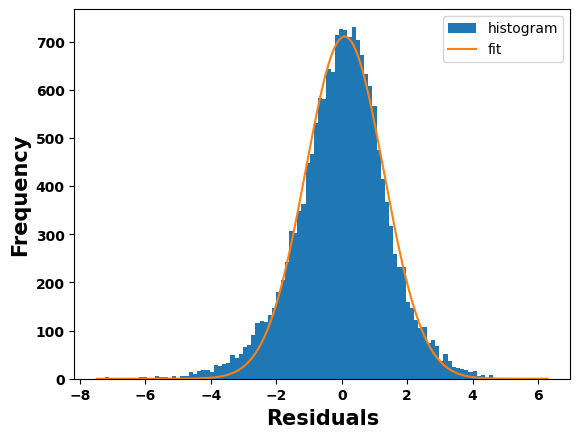

In [25]:
fig = plt.figure()
bin_heights, bin_borders, _ = plt.hist(averaged_resids, bins='auto', label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit')
plt.legend()
plt.xlabel("Residuals", fontweight = "bold",fontsize = 15)
plt.ylabel("Frequency", fontweight = "bold", fontsize = 15)
plt.xticks(fontsize = 10, fontweight = "bold")
plt.yticks(fontsize = 10, fontweight = "bold")
fig.savefig('MEnKF_DeepCDR_DualGCN_Residual_Hist_Overlay_averaged_50.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('MEnKF_DeepCDR_DualGCN_Residual_Hist_Overlay_averaged_50.png', bbox_inches='tight')
plt.show()

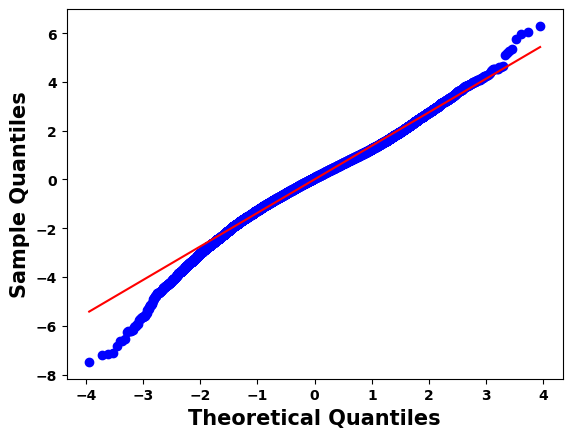

In [26]:
fig = plt.figure()
stats.probplot(averaged_resids[:,0], dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles", fontweight = "bold",fontsize = 15)
plt.ylabel("Sample Quantiles", fontweight = "bold", fontsize = 15)
plt.xticks(fontsize = 10, fontweight = "bold")
plt.yticks(fontsize = 10, fontweight = "bold")
plt.title("")
fig.savefig('MEnKF_DeepCDR_DualGCN_QQ_Plot_averaged_50.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('MEnKF_DeepCDR_DualGCN_QQ_Plot_averaged_50.png', bbox_inches='tight')
plt.show()

In [27]:
import pandas as pd

In [28]:
catch_dfs = []
for item in catch: 
    item1 = item[-12:-8]
    DeepCDR_Drugs, DeepCDR_Omics, DualGCN_Drugs, DualGCN_Omics = np.array(item1[0])[:,0], np.array(item1[1])[:,0], np.array(item1[2])[:,0], np.array(item1[3])[:,0]
    combo = np.hstack((DeepCDR_Drugs.reshape(-1,1), DeepCDR_Omics.reshape(-1,1), DualGCN_Drugs.reshape(-1,1), DualGCN_Omics.reshape(-1,1)))
    combo_df = pd.DataFrame(combo)
    combo_df.columns = ["DeepCDR_Drugs", "DeepCDR_Omics", "DualGCN_Drugs", "DualGCN_Omics"]
    combo_df["update_iteration"] = np.array(list(range(0, combo_df.shape[0]))) + 1
    catch_dfs.append(combo_df)

In [29]:
catch_dfs_df = pd.concat(catch_dfs)

In [30]:
catch_dfs_df.shape

(1860, 5)

In [31]:
how_often_at_each_update  = catch_dfs_df.groupby("update_iteration")[["DeepCDR_Drugs"]].count()

In [32]:
how_often_at_each_update.columns = ["counts"]

In [33]:
how_often_at_each_update = how_often_at_each_update.reset_index()

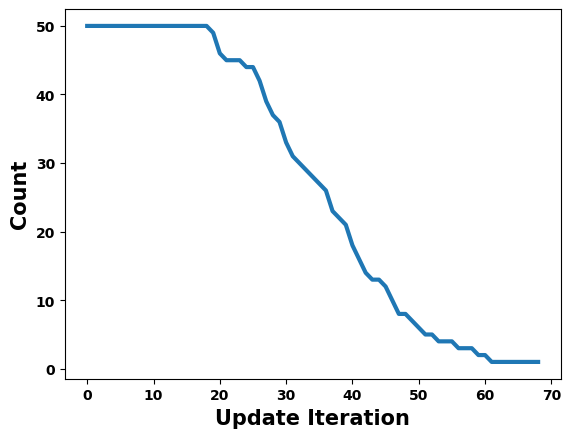

In [104]:
fig = plt.figure()
plt.plot(how_often_at_each_update["counts"], linewidth = 3)
plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
plt.ylabel("Count", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")
fig.savefig('MEnKF_DeepCDR_DualGCN_Update_Iterations_averaged_50.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('MEnKF_DeepCDR_DualGCN_Update_Iterations_averaged_50.png', bbox_inches='tight')
plt.show()

In [35]:
# plt.hist()

In [36]:
# mean_weights_at_each_update.sum(1)

In [37]:
# mean_weights_at_each_update

In [38]:
mean_weights_at_each_update  = catch_dfs_df.groupby("update_iteration").mean()
mean_weights_at_each_update = mean_weights_at_each_update.reset_index()

In [39]:
mean_weights_at_each_update = mean_weights_at_each_update[mean_weights_at_each_update["update_iteration"] <= 30]

In [40]:
mean_weights_at_each_update = mean_weights_at_each_update.set_index("update_iteration")

In [41]:
std_weights_at_each_update = catch_dfs_df.groupby("update_iteration").std()
std_weights_at_each_update = std_weights_at_each_update.reset_index()

In [42]:
std_weights_at_each_update = std_weights_at_each_update[std_weights_at_each_update["update_iteration"] <= 30]

In [43]:
std_weights_at_each_update.shape

(30, 5)

In [44]:
# std_weights_at_each_update = std_weights_at_each_update.reset_index()

In [45]:
std_weights_at_each_update = std_weights_at_each_update.set_index("update_iteration")

In [46]:
len_updates = mean_weights_at_each_update.shape[0]

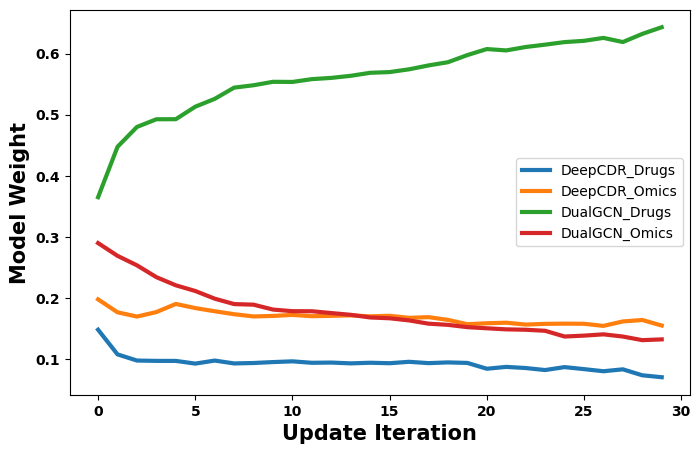

In [47]:
fig = plt.figure(figsize=(8, 5))
plt.plot(range(0,len_updates), mean_weights_at_each_update.iloc[:,0], 
            label = "DeepCDR_Drugs", linewidth = 3)

plt.plot(range(0,len_updates),  mean_weights_at_each_update.iloc[:,1], 
            label = "DeepCDR_Omics", linewidth = 3)

plt.plot(range(0,len_updates),  mean_weights_at_each_update.iloc[:,2], 
            label = "DualGCN_Drugs", linewidth = 3)

plt.plot(range(0,len_updates),  mean_weights_at_each_update.iloc[:,3],  
            label = "DualGCN_Omics", linewidth = 3)

plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
plt.ylabel("Model Weight", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")

plt.legend()
fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories_averaged_50.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories_averaged_50.png', bbox_inches='tight')

plt.show()

In [48]:
# std_weights_at_each_update

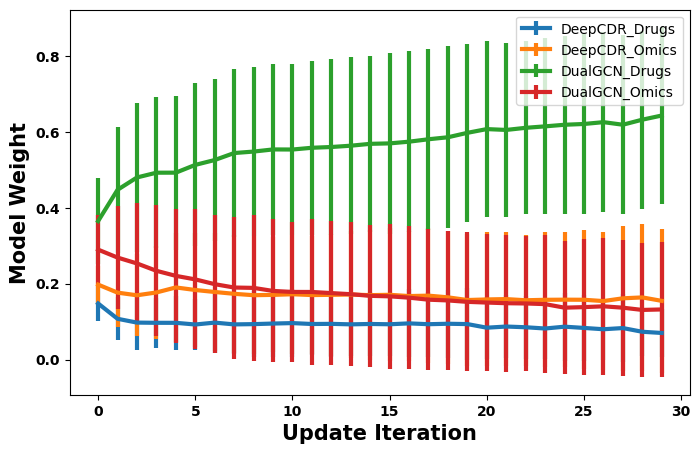

In [49]:
fig = plt.figure(figsize=(8, 5))
plt.errorbar(range(0,len_updates), mean_weights_at_each_update.iloc[:,0], yerr=std_weights_at_each_update.iloc[:,0], 
            label = "DeepCDR_Drugs", linewidth = 3)

plt.errorbar(range(0,len_updates),  mean_weights_at_each_update.iloc[:,1], yerr=std_weights_at_each_update.iloc[:,1], 
            label = "DeepCDR_Omics", linewidth = 3)

plt.errorbar(range(0,len_updates),  mean_weights_at_each_update.iloc[:,2], yerr=std_weights_at_each_update.iloc[:,2], 
            label = "DualGCN_Drugs", linewidth = 3)

plt.errorbar(range(0,len_updates),  mean_weights_at_each_update.iloc[:,3], yerr=std_weights_at_each_update.iloc[:,3], 
            label = "DualGCN_Omics", linewidth = 3)

plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
plt.ylabel("Model Weight", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")

plt.legend()
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.pdf', bbox_inches='tight', format = "pdf")
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.png', bbox_inches='tight')

plt.show()

In [50]:
# item1[1]

In [51]:
# combo

In [52]:
catch_dfs_rmse = []
for item in catch: 
    item1 = item[8:10]
    train_rmse = np.array(item1[0]).reshape(-1,1)
    test_rmse = np.array(item1[1]).reshape(-1,1)
    # DeepCDR_Drugs, DeepCDR_Omics, DualGCN_Drugs, DualGCN_Omics = np.array(item1[0])[:,0], np.array(item1[1])[:,0], np.array(item1[2])[:,0], np.array(item1[3])[:,0]
    combo = np.hstack((train_rmse, test_rmse))
    combo_df = pd.DataFrame(combo)
    combo_df.columns = ["Train_RMSE", "Test_RMSE"]
    combo_df["update_iteration"] = np.array(list(range(0, combo_df.shape[0]))) + 1
    catch_dfs_rmse.append(combo_df)

In [53]:
catch_dfs_rmse_df = pd.concat(catch_dfs_rmse)

In [54]:
rmse_at_each_update  = catch_dfs_rmse_df.groupby("update_iteration").mean()
rmse_at_each_update = rmse_at_each_update.reset_index()

In [55]:
rmse_at_each_update = rmse_at_each_update[rmse_at_each_update["update_iteration"] <= 30]

In [56]:
rmse_at_each_update = rmse_at_each_update.set_index("update_iteration")

In [57]:
std_weights_at_each_update = catch_dfs_rmse_df.groupby("update_iteration").std()
std_weights_at_each_update = std_weights_at_each_update.reset_index()

In [58]:
std_weights_at_each_update = std_weights_at_each_update[std_weights_at_each_update["update_iteration"] <= 30]

In [59]:
std_weights_at_each_update = std_weights_at_each_update.set_index("update_iteration")

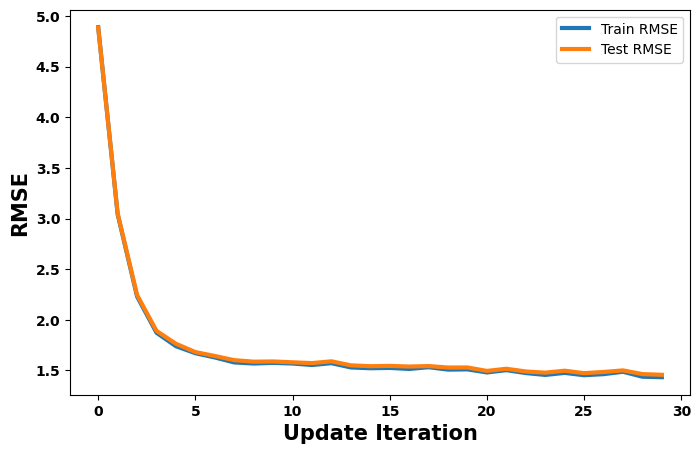

In [60]:
fig = plt.figure(figsize=(8, 5))
plt.plot(range(0,len_updates), rmse_at_each_update.iloc[:,0], 
            label = "Train RMSE", linewidth = 3)

plt.plot(range(0,len_updates),  rmse_at_each_update.iloc[:,1], 
            label = "Test RMSE", linewidth = 3)


plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
plt.ylabel("RMSE", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")

plt.legend()
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.pdf', bbox_inches='tight', format = "pdf")
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.png', bbox_inches='tight')

plt.show()

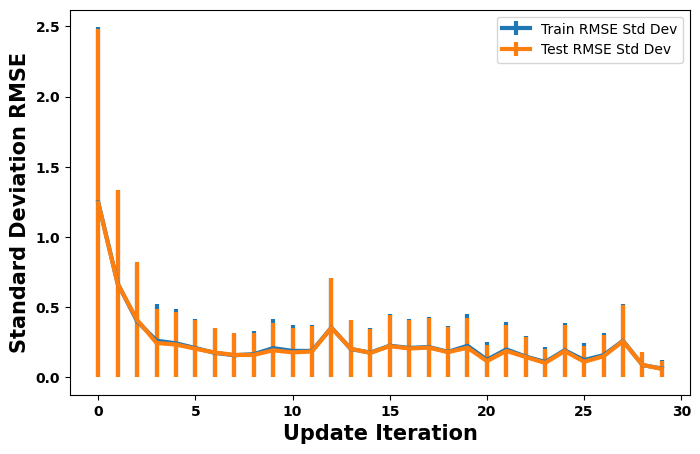

In [61]:
fig = plt.figure(figsize=(8, 5))
plt.errorbar(range(0,len_updates), std_weights_at_each_update.iloc[:,0], yerr=std_weights_at_each_update.iloc[:,0], 
            label = "Train RMSE Std Dev", linewidth = 3)

plt.errorbar(range(0,len_updates),  std_weights_at_each_update.iloc[:,1], yerr=std_weights_at_each_update.iloc[:,1], 
            label = "Test RMSE Std Dev", linewidth = 3)


plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
plt.ylabel("Standard Deviation RMSE", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")

plt.legend()
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.pdf', bbox_inches='tight', format = "pdf")
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.png', bbox_inches='tight')

plt.show()

In [62]:
# rmse_at_each_update.iloc[:,0]

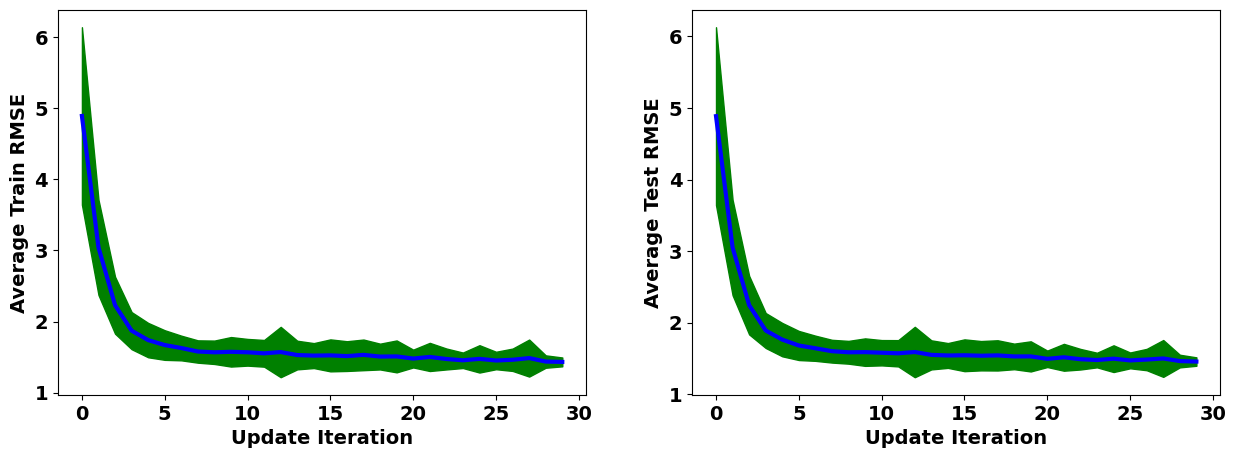

In [63]:
fig, axs = plt.subplots(1, 2,figsize=(15, 5))
# fig, axs = plt.subplots(4, 2)
axs = axs.ravel()
axs[0].plot(range(0,len_updates), rmse_at_each_update.iloc[:,0], linewidth = 3,  c = "blue", label = "Train")
axs[0].fill_between(range(0,len_updates), rmse_at_each_update.iloc[:,0]-std_weights_at_each_update.iloc[:,0], rmse_at_each_update.iloc[:,0]+std_weights_at_each_update.iloc[:,0], color = "green")
axs[1].plot(range(0,len_updates), rmse_at_each_update.iloc[:,1],linewidth = 3, c = "blue", label = "Test")
axs[1].fill_between(range(0,len_updates), rmse_at_each_update.iloc[:,1]-std_weights_at_each_update.iloc[:,1], rmse_at_each_update.iloc[:,1]+std_weights_at_each_update.iloc[:,1], color = "green")
plt.setp(axs[0].get_xticklabels(), fontsize=14, fontweight="bold"
        )
    
plt.setp(axs[0].get_yticklabels(), fontsize=14, fontweight="bold")
plt.setp(axs[1].get_xticklabels(), fontsize=14, fontweight="bold"
        )
    
plt.setp(axs[1].get_yticklabels(), fontsize=14, fontweight="bold")
axs[0].set(xlabel="Update Iteration", ylabel="Average Train RMSE")
axs[1].set(xlabel="Update Iteration", ylabel="Average Test RMSE")
axs[0].xaxis.label.set(fontsize=14, fontweight="bold")
axs[1].xaxis.label.set(fontsize=14, fontweight="bold")
axs[0].yaxis.label.set(fontsize=14, fontweight="bold")
axs[1].yaxis.label.set(fontsize=14, fontweight="bold")
fig.savefig('MEnKF_DeepCDR_DualGCN_RMSE_Trajectories_averaged_50.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('MEnKF_DeepCDR_DualGCN_RMSE_Trajectories_averaged_50.png', bbox_inches='tight')
plt.show()

In [64]:
# preds.shape

In [65]:
all_li = np.zeros((y_test.shape[0], len(catch)))
all_ui = np.zeros((y_test.shape[0], len(catch)))
for i, item in enumerate(catch): 
    preds = item[-3:-1]
    all_li[:,i] =  preds[0][:,0]
    all_ui[:,i] =  preds[1][:,0]

In [66]:
# all_li

In [88]:
y_test.shape

(17316, 1)

In [89]:
li = np.median(all_li, axis = 1).reshape(-1,1)

In [105]:
li_mean = np.mean(all_li, axis = 1).reshape(-1,1)

In [90]:
li.shape

(17316, 1)

In [91]:
ui = np.median(all_ui, axis = 1).reshape(-1,1)

In [106]:
ui_mean = np.mean(all_ui, axis = 1).reshape(-1,1)

In [92]:
combo = np.hstack((y_test, li, ui))

In [107]:
combo_mean = np.hstack((y_test, li_mean, ui_mean))

In [109]:
combo_mean_df = pd.DataFrame(combo_mean)

In [111]:
combo_mean_df.columns = ["IC50", "LI_IC50_Pred", "UI_IC50_Pred"]

In [112]:
combo_mean_df["coverage"] = (combo_mean_df["IC50"] >= combo_mean_df["LI_IC50_Pred"]) & (combo_mean_df["IC50"] <= combo_mean_df["UI_IC50_Pred"])

In [113]:
combo_mean_df["coverage"].mean()

0.9708939708939709

In [114]:
combo_mean_df["width"] = combo_mean_df["UI_IC50_Pred"]-combo_mean_df["LI_IC50_Pred"]

In [115]:
combo_mean_df["width"].mean()

6.666973813083574

In [93]:
combo_df = pd.DataFrame(combo)

In [94]:
combo_df.columns = ["IC50", "LI_IC50_Pred", "UI_IC50_Pred"]

In [95]:
combo_df = combo_df.sort_values("IC50").reset_index(drop = True)

In [96]:
combo_df["coverage"] = (combo_df["IC50"] >= combo_df["LI_IC50_Pred"]) & (combo_df["IC50"] <= combo_df["UI_IC50_Pred"])

In [97]:
combo_df["coverage"].mean()

0.9338184338184338

In [98]:
combo_df["width"] = combo_df["UI_IC50_Pred"]-combo_df["LI_IC50_Pred"]

In [100]:
combo_df["width"].mean()

5.3178346946397985

In [79]:
combo_df1 = combo_df.sample(100)

In [80]:
combo_df1 = combo_df1.sort_values("IC50").reset_index(drop = True)

In [101]:
np.min(rmse_at_each_update.iloc[:,1])

1.4567250761677761

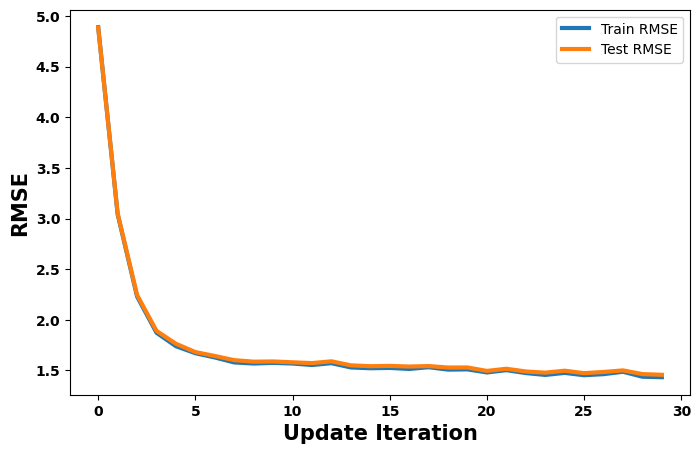

In [81]:
fig = plt.figure(figsize=(8, 5))
plt.plot(range(0,len_updates), rmse_at_each_update.iloc[:,0], 
            label = "Train RMSE", linewidth = 3)

plt.plot(range(0,len_updates),  rmse_at_each_update.iloc[:,1], 
            label = "Test RMSE", linewidth = 3)


plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
plt.ylabel("RMSE", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")

plt.legend()
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.pdf', bbox_inches='tight', format = "pdf")
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.png', bbox_inches='tight')

plt.show()

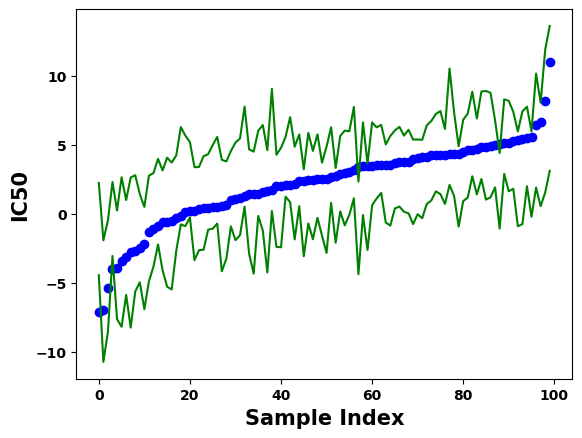

In [85]:
fig= plt.figure()
# fig, axs = plt.subplots(4, 2)
plt.scatter(range(0,combo_df1.shape[0]), combo_df1["IC50"].values,   c = "blue", label = "IC50")
plt.plot(range(0,combo_df1.shape[0]), combo_df1["LI_IC50_Pred"].values,   c = "green",
            label = "Lower Prediction Interval")
plt.plot(range(0,combo_df1.shape[0]), combo_df1["UI_IC50_Pred"].values,   c = "green",
            label = "Upper Prediction Interval")
# plt.fill_between(range(0,combo_df1.shape[0]), combo_df1["LI_IC50_Pred"].values, combo_df1["UI_IC50_Pred"].values,
#                  color = "green", label = "Empirical 95 % Prediction Interval",alpha=0.6)

plt.xlabel("Sample Index", fontsize = 15, fontweight = "bold")
plt.ylabel("IC50", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")
# plt.setp(axs[0].get_xticklabels(), fontsize=14, fontweight="bold"
#         )
    
# plt.setp(axs[0].get_yticklabels(), fontsize=14, fontweight="bold")
# plt.setp(axs[1].get_xticklabels(), fontsize=14, fontweight="bold"
#         )
    
# plt.setp(axs[1].get_yticklabels(), fontsize=14, fontweight="bold")
# axs[0].set(xlabel="Update Iteration", ylabel="Average Train RMSE")
# axs[1].set(xlabel="Update Iteration", ylabel="Average Test RMSE")
# axs[0].xaxis.label.set(fontsize=14, fontweight="bold")
# axs[1].xaxis.label.set(fontsize=14, fontweight="bold")
# axs[0].yaxis.label.set(fontsize=14, fontweight="bold")
# axs[1].yaxis.label.set(fontsize=14, fontweight="bold")
# plt.legend()
fig.savefig('MEnKF_DeepCDR_DualGCN_Prediction_Intervals_averaged_50.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('MEnKF_DeepCDR_DualGCN_Prediction_Intervals_averaged_50.png', bbox_inches='tight')
plt.show()

In [83]:
# plt.scatter(list(range(0, combo_df["IC50"].shape[0])),combo_df["IC50"].values, label = "IC50")
# plt.scatter(list(range(0, combo_df["IC50"].shape[0])),combo_df["LI_IC50_Pred"].values, label = "Lower Interval IC50 MEnKF-ANN Preds")